In [5]:
%pip install pandas openpyxl matplotlib natasha bs4 razdel urlextract phonenumbers nltk pyspellchecker pyarrow fastparquet

  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 10.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.0 MB/s eta 0:00:00
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
cols = [ 'Текст', 'Пол' ]
data = pd.read_excel("./data/source.xlsx", index_col=0)[cols]

In [36]:
data["length"] = data['Текст'].str.len()
data["length"].describe()

count    16942.000000
mean      3849.738638
std       4216.359922
min          1.000000
25%       1514.000000
50%       2412.500000
75%       4284.500000
max      32767.000000
Name: length, dtype: float64

In [37]:
data['length'].quantile([0.01, 0.02, 0.03, 0.05, 0.5, 0.85, 0.9, 0.95])

0.01       85.64
0.02     1034.00
0.03     1057.23
0.05     1095.00
0.50     2412.50
0.85     6213.85
0.90     8115.80
0.95    11954.60
Name: length, dtype: float64

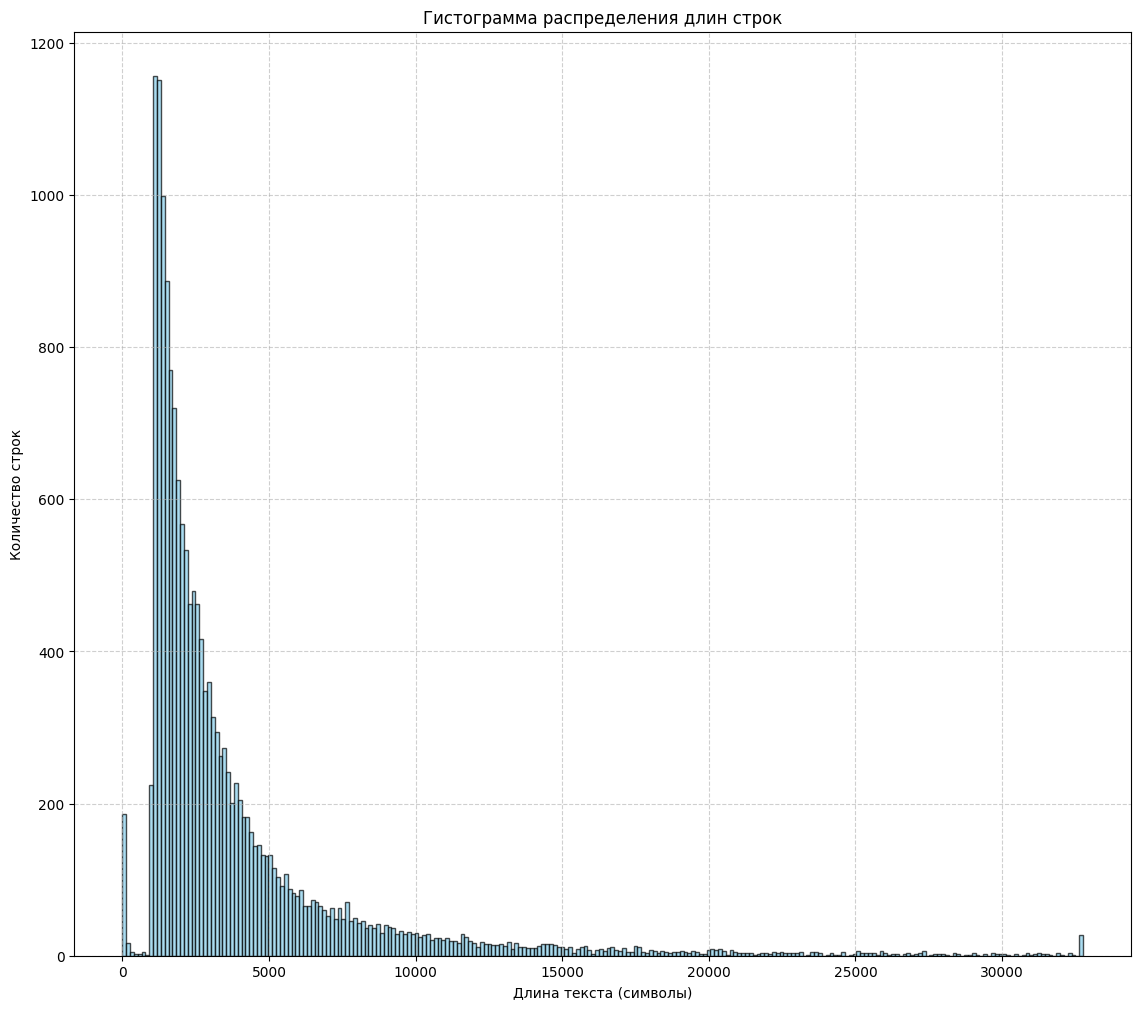

In [ ]:
plt.figure(figsize=(30, 12))
plt.subplot(1, 2, 1) 
n, bins, patches = plt.hist(data['length'], bins=250, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Гистограмма распределения длин строк')
plt.xlabel('Длина текста (символы)')
plt.ylabel('Количество строк')
plt.grid(True, linestyle='--', alpha=0.6)

In [ ]:
data = data[(data['length'] > 1000) & (data['length'] < 6000)]

In [ ]:
# Удаляем заголовки блогов
mask_with_headers = data['Текст'].str.contains(r'(\n\s*\n)+', regex=True)
data.loc[mask_with_headers, 'Текст'] = data.loc[mask_with_headers, 'Текст'].str.replace(r'^.*?(\n\s*\n)+', '', regex=True)
data.dropna(inplace=True)

/tmp/ipykernel_3954/1374796571.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_with_headers = data['Текст'].str.contains(r'(\n\s*\n)+', regex=True)


In [40]:
# Удаляем с некорректными цитатами
mask_invalid_text = data['Текст'].str.count('"') % 2 == 1
data = data[~mask_invalid_text]

In [ ]:
data.to_excel('./data/raw.xlsx')